<a href="https://colab.research.google.com/github/rahulkunte/article-summary/blob/main/Airbnb_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all necessary modules

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.metrics import mean_squared_error as mse 

In [4]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.9 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: visions

In [5]:
from ydata_profiling import ProfileReport

In [6]:
from sklearn.linear_model import LinearRegression as lr

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/train_a1.csv")

We create the train-test split first, before the preprocessing

In [9]:
report = ProfileReport(train_data)

In [10]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### The most basic model 
- The most simple model would predict the same for all observations : average or median of the training dataset


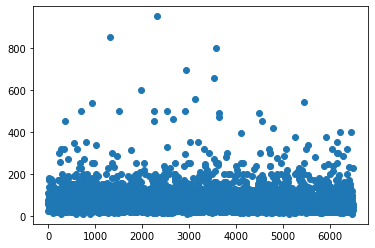

In [21]:
plt.scatter(np.arange(0,len(train_data['target'])), train_data['target'])

In [17]:
len(np.arange(0,len(train_data['target'])))

6494

In [24]:
train_copy = train_data.copy(deep = 1)

In [20]:
train_data['target'].head()

0     26
1     75
2    110
3     60
4     55
Name: target, dtype: int64

In [ ]:
train_copy.head()

,property_id,property_name,property_summary,property_space,property_desc,property_neighborhood,property_notes,property_transit,property_access,property_interaction,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,1,"Chambre à louer,courte durée.","Je loue une chambre dans mon appartement ""atyp...","Espace duplex très grand et lumineux,la chambr...","Je loue une chambre dans mon appartement ""atyp...",NaN,NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,NaN,Je suis entièrement disponible pour tout échan...,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2,Urban Antwerp - Spacious & Authentic Herenhouse,Our place is a typical historic herenhuis clos...,The spaces in our house are all large with hig...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,NaN,In Antwerp we have the system with rental bike...,You will be able to access the following space...,We are always available to help and assist whe...,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,3,comfortable apartment in friendly neighborhood,Nice and cozy apartment for couples who like t...,Nice proper and clean apartment. No personal s...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,Public transport is next to the apartment and ...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,As a good host I trust my guest. No secrets an...,"Ik ben altijd bereikbaar voor vragen, maar ben...",...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,4,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,5,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,NaN,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [ ]:
train_data.columns

In [25]:
train_copy['basic_target'] = train_data['target'].median()

In [23]:
train_data['target'].median()

55.0

#### Accuracy of the basic model

In [26]:
print('Root mean Squared Error of the basic model on the validation set is:',mse(train_copy['target'], train_copy['basic_target'],squared=0))

Root mean Squared Error of the basic model on the validation set is: 53.48542641792253


#### Procedure
- First, we try to predict using only numeric column variables.
    - Hence, we drop the categorical variables.
    - Then, we also drop columns that are highly correlated with each other. 
    - Next, we must impute all the missing values with the respective median values

#### Removing unwanted columns
- Property ID and host ID are probably not providing information about the property
- Property zipcode is highly correlated with lattitude, so we can omit property_lat
- max guests and number of beds are also correlated 0.775 
- host_nr_listings and total listings have a correlation of 1 

#### ProfileReport on the data with only numeric columns

In [ ]:
ProfileReport(train_data.select_dtypes(include=[np.number]))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Removing variables with high correlation 

In [ ]:
train_data.columns

Index(['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 're

In [ ]:
#'property_id','host_id', 'property_lat', 'property_beds',
#'booking_availability_30', 'booking_availability_60', 
#'booking_availability_90','reviews_per_month','host_nr_listings'
train_data[['property_lon', 'property_max_guests',\
       'property_bathrooms', 'property_bedrooms',\
       'property_sqfeet', 'host_response_rate',\
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',\
       'booking_max_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',\
       'reviews_communication', 'reviews_location', 'reviews_value'\
       ,'target']]



,property_lon,property_max_guests,property_bathrooms,property_bedrooms,property_sqfeet,host_response_rate,host_nr_listings_total,booking_price_covers,booking_min_nights,booking_max_nights,booking_availability_365,reviews_num,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,target
0,4.376594,1,1.0,1.0,NaN,100.0,1.0,1,1,1125,96,23,97.0,10.0,9.0,10.0,10.0,9.0,10.0,26
1,4.413748,4,1.5,2.0,NaN,75.0,1.0,1,2,15,25,1,100.0,10.0,10.0,10.0,10.0,8.0,10.0,75
2,4.409351,2,1.0,1.0,NaN,100.0,1.0,1,2,1125,330,4,93.0,10.0,10.0,9.0,9.0,9.0,10.0,110
3,4.405446,2,1.0,1.0,NaN,100.0,2.0,1,1,1125,339,109,98.0,10.0,10.0,10.0,10.0,10.0,10.0,60
4,4.404945,2,1.0,1.0,NaN,100.0,2.0,1,1,1125,355,61,97.0,10.0,10.0,10.0,10.0,10.0,10.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,4.337405,2,1.0,1.0,NaN,100.0,1.0,1,2,8,140,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,35
6491,4.338456,2,1.0,1.0,NaN,100.0,1.0,1,1,1125,249,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
6492,4.428283,2,1.0,1.0,NaN,NaN,1.0,1,2,1125,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
6493,4.431681,4,1.0,1.0,NaN,NaN,2.0,2,2,14,0,9,100.0,10.0,10.0,10.0,10.0,8.0,10.0,230


Split the data before preprocessing:

In [27]:
X = train_data
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

The preprocessing function:

In [28]:
def prep_num(df):
  df = df.copy(deep=1)
  df = df.loc[:,['property_lon', 'property_max_guests',\
       'property_bathrooms', 'property_bedrooms',\
       'property_sqfeet', 'host_response_rate',\
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',\
       'booking_max_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',\
       'reviews_communication', 'reviews_location', 'reviews_value']]
  
  for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)
  
  return df

<Axes: >

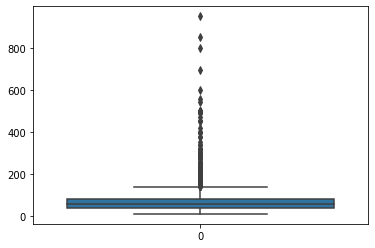

In [31]:
import seaborn as sns
sns.boxplot(X_train['target'])

Outlier detection and removal
- IQR on Y, Isolation forests


In [34]:
from sklearn.ensemble import IsolationForest as ISF

In [35]:
clf = ISF(n_estimators = 10, warm_start = 1)

In [39]:
#we need to remove nan first
X_train_copy = X_train.loc[:,['property_lon', 'property_max_guests',\
       'property_bathrooms', 'property_bedrooms',\
       'property_sqfeet', 'host_response_rate',\
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',\
       'booking_max_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',\
       'reviews_communication', 'reviews_location', 'reviews_value']].copy(deep=1)
for col in X_train_copy.columns:
  X_train_copy[col].fillna(X_train_copy[col].median(), inplace=True)


In [ ]:
clf.fit(X_train_copy)

In [ ]:
clf.set_params(n_estimators=20)

In [ ]:
clf.fit(X_train_copy)

In [46]:
for col in X_train_copy.columns:
  plt.scatter(np.arange(0,len(X_train_copy[col]),X_train_copy[col]))

ValueError: ignored

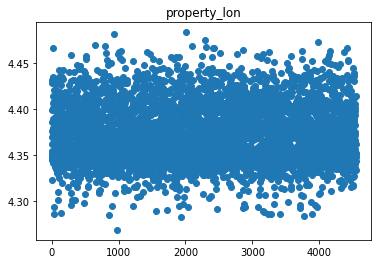

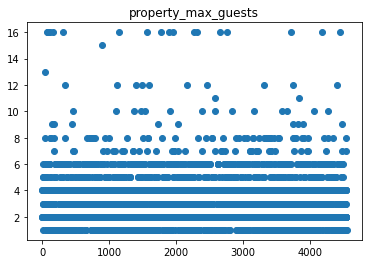

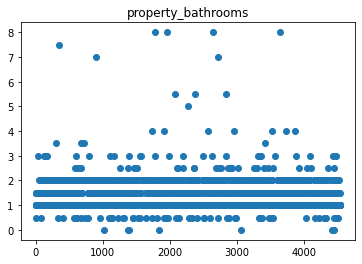

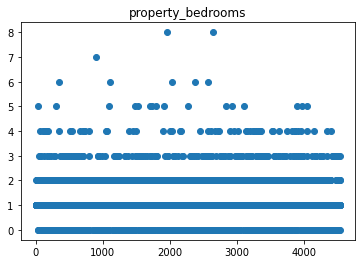

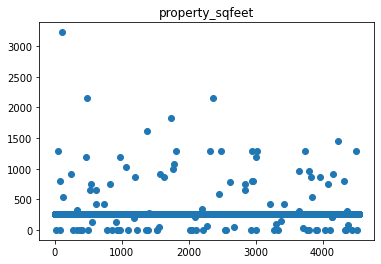

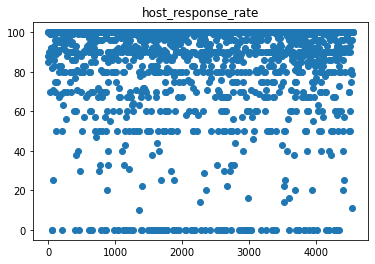

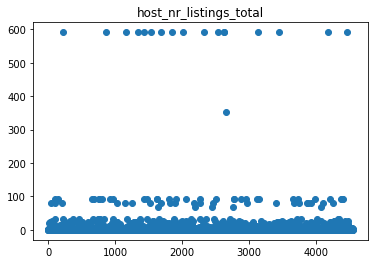

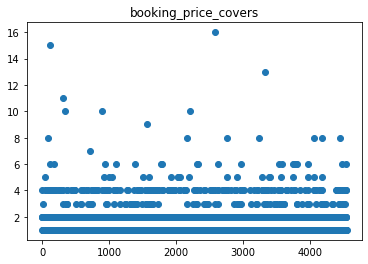

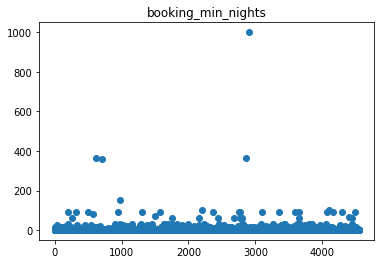

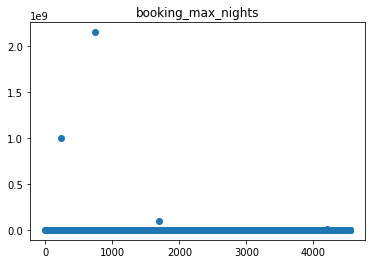

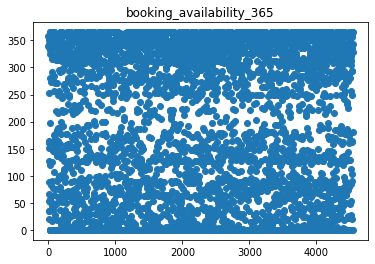

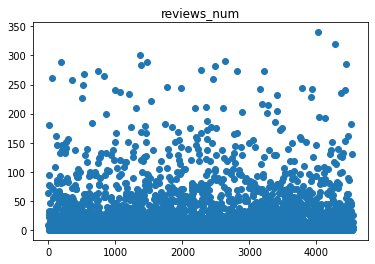

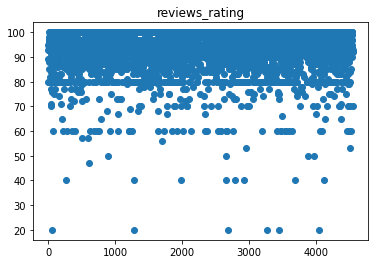

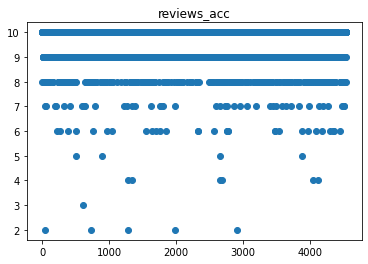

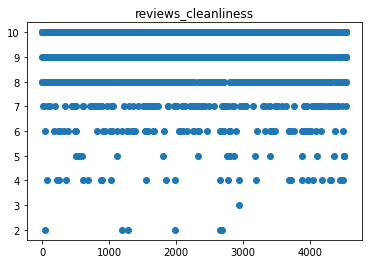

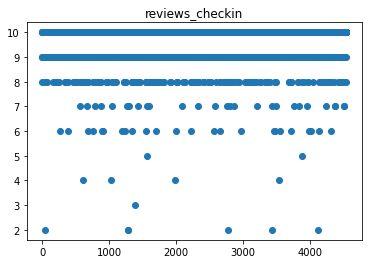

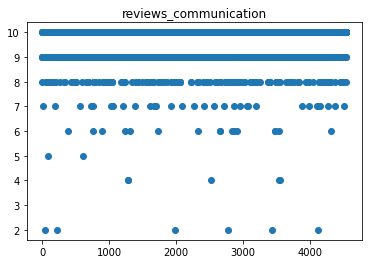

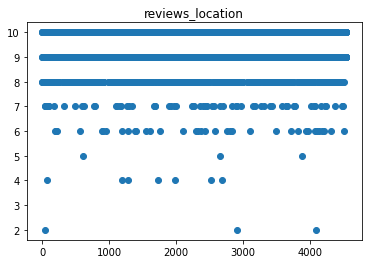

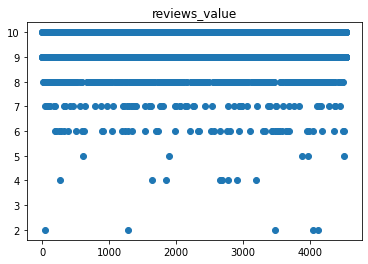

In [58]:
for col in X_train_copy.columns:
  #print(np.arange(0,len(X_train_copy[col])))
  plt.scatter(np.arange(0,len(X_train_copy[col])), X_train_copy[col])
  plt.title(col)
  plt.show()

In [ ]:
X_train = prep_num(X_train)
X_test = prep_num(X_test)

#### Linear/Polynomial Regression Models:
    - LinearRegression from scikitlearn

Now we will take care of all the missing values in the numeric columns
   

*   It looks like property_sqfeet has 6333 missing values, hence instead of imputing we just remove that columns



 

##### So now we have the cleaned data with median of the training column imputed to all missing values.
##### We pass this to the linear regression model

In [ ]:
### Might be susceptible to data leakage as we are making the split after imputation
# We have to create this split first, then perform the pre-processing

In [ ]:
model = lr()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([68.65703801, 69.65811136, 68.1795711 , ..., 67.80027561,
       66.47062862, 69.94159672])

In [ ]:
print('Root mean squared error of LR model for numeric columns on the validation set is: ', mse(model.predict(X_test),y_test, squared = 0))

Root mean squared error of LR model for numeric columns on the validation set is:  45.98933557014747


In [ ]:
final_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/test_a1.csv")

In [ ]:
final_test_data.info()

In [ ]:
nf_test_data = final_test_data.copy(deep=1)
nf_test_data = prep_num(nf_test_data)

In [ ]:
nf_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_lon              919 non-null    float64
 1   property_max_guests       919 non-null    int64  
 2   property_bathrooms        919 non-null    float64
 3   property_bedrooms         919 non-null    int64  
 4   property_sqfeet           919 non-null    float64
 5   host_response_rate        919 non-null    float64
 6   host_nr_listings_total    919 non-null    int64  
 7   booking_price_covers      919 non-null    int64  
 8   booking_min_nights        919 non-null    int64  
 9   booking_max_nights        919 non-null    int64  
 10  booking_availability_365  919 non-null    int64  
 11  reviews_num               919 non-null    int64  
 12  reviews_rating            919 non-null    float64
 13  reviews_acc               919 non-null    float64
 14  reviews_cl

In [ ]:
test_preds = model.predict(nf_test_data)

In [ ]:
test_preds

In [ ]:
final_test_data['property_id']

0      6501
1      6502
2      6503
3      6504
4      6505
       ... 
914    7415
915    7416
916    7417
917    7418
918    7419
Name: property_id, Length: 919, dtype: int64

In [ ]:
test_preds.asdf

AttributeError: ignored

In [ ]:
pd.concat([final_test_data['property_id'],pd.DataFrame(test_preds)], axis=1).to_csv("Trial1.csv", header=0, index =0)